# Import Essential Libraries

In [1]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

# Mount Google Drive

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


#Import Time Series in Python
In read_csv() function, set parse_dates = True, to convert the ‘Date’ column to DateTimeIndex


In [3]:
df_stock = pd.read_csv('data/FB_data.csv', parse_dates=True, index_col = "Date")


# adding Date as column and index
df_stock['Date'] = df_stock.index

df = df_stock

# adding daily interval
df.index = pd.DatetimeIndex(df.index).to_period('D')

# display
display(df_stock.head())
display(df_stock.tail())

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-06-20,190.949997,191.160004,187.639999,189.529999,189.529999,14635700,2019-06-20
2019-06-21,188.750000,192.000000,188.750000,191.139999,191.139999,22751200,2019-06-21
2019-06-24,192.419998,193.979996,191.570007,192.600006,192.600006,15509000,2019-06-24
2019-06-25,192.880005,193.139999,188.130005,188.839996,188.839996,16750300,2019-06-25
2019-06-26,189.539993,190.759995,187.309998,187.660004,187.660004,12808600,2019-06-26


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-06-15,225.089996,233.770004,224.800003,232.500000,232.500000,15340300,2020-06-15
2020-06-16,237.139999,238.460007,233.000000,235.649994,235.649994,15236700,2020-06-16
2020-06-17,235.000000,237.589996,231.729996,235.529999,235.529999,19552800,2020-06-17
2020-06-18,234.990005,236.139999,232.149994,235.940002,235.940002,15782500,2020-06-18
2020-06-19,237.789993,240.830002,235.550003,238.789993,238.789993,30069700,2020-06-19


# Quick Plot

In [4]:
fig = px.line(
    data_frame = df_stock, 
    x='Date', 
    y='Open', 
    title='Stock price (Open)'
)

fig.show()

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

# remove Volume from this dataset
df_stock_temp = df_stock.drop(['Volume'], axis = 1)

df_stock_melted = pd.melt(
    df_stock_temp, id_vars=['Date'], 
    var_name = 'Label',
    value_vars=['Open', 'High', 'Low', 'Close', 'Adj Close'],    
    value_name = 'Value'
)
df_stock_melted.set_index(['Date'], inplace=True)
df_stock_melted['Date'] = df_stock_melted.index


display(df_stock_melted.head())
display(df_stock_melted.tail())

,Label,Value,Date
Date,,,
2019-06-20,Open,190.949997,2019-06-20
2019-06-21,Open,188.750000,2019-06-21
2019-06-24,Open,192.419998,2019-06-24
2019-06-25,Open,192.880005,2019-06-25
2019-06-26,Open,189.539993,2019-06-26


,Label,Value,Date
Date,,,
2020-06-15,Adj Close,232.500000,2020-06-15
2020-06-16,Adj Close,235.649994,2020-06-16
2020-06-17,Adj Close,235.529999,2020-06-17
2020-06-18,Adj Close,235.940002,2020-06-18
2020-06-19,Adj Close,238.789993,2020-06-19


# Time Series Analysis

## Moving Average (Smoothing or trend)

Trend: is there any consistent upward or downward pattern?

### Approach 1: Manaully calculating moving averages
More info: https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/

In [ ]:
# window size or lag = 5
window_size = 50
df_rolling = df['Open'].rolling(window = window_size).mean()
display(df_rolling.head())

Date
2019-06-20   NaN
2019-06-21   NaN
2019-06-24   NaN
2019-06-25   NaN
2019-06-26   NaN
Freq: D, Name: Open, dtype: float64

In [ ]:
# replace missing values
df_rolling = df_rolling.fillna(df_rolling.mean())
display(df_rolling.head())

Date
2019-06-20    192.695573
2019-06-21    192.695573
2019-06-24    192.695573
2019-06-25    192.695573
2019-06-26    192.695573
Freq: D, Name: Open, dtype: float64

In [ ]:
## visualize the orginal and sliding window 

fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Date'], y = df_rolling, name="moving average"))
fig.add_trace(go.Scatter(x = df['Date'],y = df['Open'], name="original"))    

fig.show()

### Approach 2: Use library function in Plotly
Note that this is not exactly the same as Approach 1. 

Ref: https://plotly.com/python/linear-fits/ 

In [ ]:
fig = px.scatter(
  data_frame = df['Open'], 
  y='Open', trendline="rolling", 
  trendline_options=dict(window=window_size), 
  title='5-point moving average Stock price (Open)'
)
fig.show()

### Approach 3: Hybrid (use Plotly express + Go)

This approach is ugly and not recommended. Only use it if absolutely necessary.

In [ ]:
# create to plotly express figures

## first
fig_px = px.scatter(
  data_frame = df['Open'], 
  y='Open', trendline="rolling", 
  trendline_options=dict(window=window_size), 
  title='5-point moving average Stock price (Open)'
)
## add color
fig_px.update_traces(line=dict(color = 'rgba(50,50,50,0.2)'))

## second
fig_px1 = px.line(
  data_frame = df['Open'], 
  y='Open', 
  title='Stock price (Open)'
) 

## combine them with go.Figure (note that the 'data' attribute is extracted and combined)
fig = go.Figure(data = fig_px.data + fig_px1.data)

fig.show()

## Autocorrelation and Partial Autocorrelation
A correlation between a time series and its delayed version.
Useful in finding patterns

### Auto-correlation (ACF)

An auto-autocorrelation (ACF) is the summary of the correlation between a data point at t ($D_t$) and all the data points at prior (lagged) time steps (e.g., $D_{t-1}$, $D_{t-2}$, $D_{t-3}$ $\dots$ $D_{t-p}$).

It accounts for both the direct and indirect relationship between $D_t$ and $D_{t-p}$.

#### Create a lagged dataset by 1. This model is commonly known as AR(1).

In [ ]:
# create a lagged dataset by 1
nlag = 3 # 

# take the original data
display(df['Open'].head(5))

df_lagged = df['Open'].shift(nlag)

# manually check the difference
display(df_lagged.head(5))

Date
2019-06-20    190.949997
2019-06-21    188.750000
2019-06-24    192.419998
2019-06-25    192.880005
2019-06-26    189.539993
Freq: D, Name: Open, dtype: float64

Date
2019-06-20           NaN
2019-06-21           NaN
2019-06-24           NaN
2019-06-25    190.949997
2019-06-26    188.750000
Freq: D, Name: Open, dtype: float64

#### Visualize two data to see any correlation

In [ ]:
# visualize to see any correlation
fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Date'], y = df_lagged, name="lagged"))
fig.add_trace(go.Scatter(x = df['Date'], y = df['Open'], name="original"))    

fig.show()

#### Draw a correlation line using plotly express
Ref: https://stackoverflow.com/questions/66146489/plotly-how-to-retrieve-regression-results-using-plotly-express

Note that this regression line won't work if nlag is greather than 1.
This is because the regression needs to find a relationship between point at t to points at t-1, t-2, ..., t-nlag, which the default OLS cannot fit. Here, an OLS trendline only fits the relationship between points at t and t-1.

In [ ]:
import math

# run actual correlation line using plotly express
fig = px.scatter(x=df_lagged.values, y=df['Open'].values, trendline="ols")
fig.show()

# retrieve model estimates
model = px.get_trendline_results(fig)
results = model.iloc[0]["px_fit_results"]
#dir(results)
alpha = results.params[0]
beta = results.params[1]
p_beta = results.pvalues[1]
r_squared = results.rsquared
r_rsquared_adj = results.rsquared_adj
#r_resid_pearson = results.resid_pearson
pearson_coeff = math.sqrt(r_squared)

display(pearson_coeff)

It seems like a strong correlation.

#### Use a library to find correlation

Y-axis shows the correlation (+1 to -1). 
X-axis shows the lag amount.
The blue shaded region shows the error margin

To learn more: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

In [ ]:
from statsmodels.graphics import tsaplots # time series plots
from statsmodels.tsa.stattools import  acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



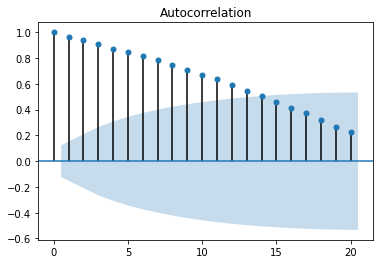

[1.         0.96362803 0.93613942 0.90580104 0.87160987 0.84406933
 0.81361114 0.78193596 0.74366141 0.70728267 0.67038575 0.63425582
 0.59241991 0.54795185 0.50240624 0.45912689 0.41371451 0.37077193
 0.32059515 0.26854214 0.22277083]


In [ ]:
nlag = 20
result = acf(x=df['Open'],  nlags = nlag)

fig = tsaplots.plot_acf(df['Open'], lags = nlag)
plt.show()
print(result)

Here, the lag 0 means the data iteself, which, of course, has the highest correlation (with itself). 

The correlation with Lag 1 is 0.96, which closely matches with our previous calculation (0.97). 

After lag 12, the correlation fell sharply.

Hence, q = 12 could a reasonal estimate for ARIMA model.

More intuition: https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling


### Partial Auto-Correlation (PACF)

A partial autocorrelation (PACF) is the summary of the correlation between a data point at t ($D_t$) and the data points at prior time steps (e.g., $D_{t-p}$) with the intervening observations removed.

It is called `partial` because the correlation between $D_t$ and $D_{t-p}$ can depend on the intermediate data points, but PACF simply ignores them.

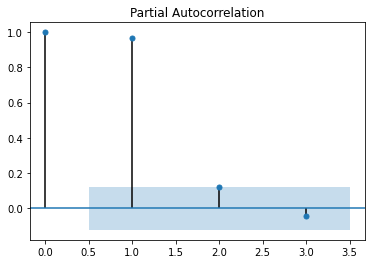

[ 1.          0.96745195  0.11923517 -0.04311809]


In [ ]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df['Open'],  nlags = nlag)

fig = tsaplots.plot_pacf(df['Open'], lags = nlag)
plt.show()
print(result)

The correlation fell sharply after lag 1. Since there are no dominant correlation at different lags, the data is unlikely to have seasonal an component.

Hence, p = 1 could a reasonal estimate for ARIMA model.

More intuition: https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling

In [ ]:
display(dir(decomposition))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

In [ ]:
display(decomposition.seasonal)

Date
2019-06-20   -1.354673
2019-06-21   -1.827982
2019-06-24   -0.640008
2019-06-25   -1.832294
2019-06-26   -2.070601
                ...   
2020-06-15   -2.621079
2020-06-16   -3.126198
2020-06-17   -3.273698
2020-06-18   -1.866983
2020-06-19   -0.805342
Freq: D, Name: Open, Length: 253, dtype: float64

Note that the seasonal values bounce between +2 to -2 and appear like a random noise. So, the data has unlikely to have any sessional property.

In [ ]:
# create a first degree diffentiation dataset

df_diff = df['Open'] -  df['Open'].shift(1)
display(df_diff)

Date
2019-06-20          NaN
2019-06-21    -2.199997
2019-06-24     3.669998
2019-06-25     0.460007
2019-06-26    -3.340012
                ...    
2020-06-15    -4.809998
2020-06-16    12.050003
2020-06-17    -2.139999
2020-06-18    -0.009995
2020-06-19     2.799988
Freq: D, Name: Open, Length: 253, dtype: float64

In [ ]:
# plot it
fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Date'], y = df_diff, name="first-degree diff"))
fig.add_trace(go.Scatter(x = df['Date'], y = df['Open'], name="original"))    

fig.show()

From this graph, the blue line (e.g., first-degree diff) makes the mean almost constant (close to 0). So, no subsequent difference is necessary.

It also means we can use `d=1` for ARIMA model

# Question C
The general format of an AR (1) model is given below, where the variable, factor, is unknown. You need to predict this factor based on ACF and PACF graphs.

Try different values for factor and check which one produces a similar graph that is posted above. To visualize an AR(1) model. 

Note that your graph may not look 100% identical to the one posted above because of the random variable w_t. Rationalize your answer to receive full credit.